In [201]:
import pandas as pd

filename = 'dataset_superstore_simple.csv'

data = pd.read_csv(filename)
data.head(5), data.count(),data.dtypes

(         order_id  order_date customer_id    segment         category  \
 0  CA-2016-152156  2016-11-08    CG-12520   Consumer        Furniture   
 1  CA-2016-152156  2016-11-08    CG-12520   Consumer        Furniture   
 2  CA-2016-138688  2016-06-12    DV-13045  Corporate  Office Supplies   
 3  US-2015-108966  2015-10-11    SO-20335   Consumer        Furniture   
 4  US-2015-108966  2015-10-11    SO-20335   Consumer  Office Supplies   
 
   sub_category     sales  quantity    profit  
 0    Bookcases  261.9600         2   41.9136  
 1       Chairs  731.9400         3  219.5820  
 2       Labels   14.6200         2    6.8714  
 3       Tables  957.5775         5 -383.0310  
 4      Storage   22.3680         2    2.5164  ,
 order_id        9988
 order_date      9988
 customer_id     9988
 segment         9988
 category        9988
 sub_category    9988
 sales           9988
 quantity        9988
 profit          9988
 dtype: int64,
 order_id         object
 order_date       object
 c

In [23]:
q1 = data.groupby(['customer_id']).sum()
q1 = q1.sort_values(['sales'],ascending=False)
q1.head(1)

,sales,quantity,profit
customer_id,,,
AB-10105,14473.571,73,5444.8055


In [36]:
#q2_cat = list(set(data['category'])) #q2_cat = list(dict.fromkeys(data['category']))

q2 = data.groupby(['category','sub_category'])['profit'].sum()
q2['Office Supplies']

sub_category
Appliances    18138.0054
Art            6527.7870
Binders       30221.7633
Envelopes      6964.1767
Fasteners       949.5182
Labels         5546.2540
Paper         34053.5693
Storage       21278.8264
Supplies      -1189.0995
Name: profit, dtype: float64

In [44]:
q3 = data['order_id'][data['profit']<0].count()
q3

1869

In [95]:
q4 = data.groupby(['customer_id'])['sales'].sum()
customer = ['JE-16165', 'KH-16510', 'AD-10180']

q4=q4[q4.index.isin(customer)].sort_values(ascending=False)
q4,q4.head(1)
#customer_id is index not value after groupby

(customer_id
 AD-10180    6106.880
 KH-16510    5952.859
 JE-16165    2697.248
 Name: sales, dtype: float64,
 customer_id
 AD-10180    6106.88
 Name: sales, dtype: float64)

In [127]:
data['order_date']=pd.to_datetime(data['order_date'])
yearly_sales = data.groupby(data['order_date'].dt.year)\
.agg({'sales':'sum','customer_id':'count','profit':'sum'})\
.rename(columns={'sales':'total_sales','customer_id':'customer_count','profit':'total_profit'})

# \ can be used to split long line of command into separate line

q5 = yearly_sales.sort_values(['total_profit'],ascending=False)
yearly_sales,q5.head(1)

(            total_sales  customer_count  total_profit
 order_date                                           
 2014        461609.0181            1992    51355.0525
 2015        470532.5090            2102    61618.6037
 2016        587205.6630            2585    79995.1763
 2017        697515.3572            3309    77759.3144,
             total_sales  customer_count  total_profit
 order_date                                           
 2016         587205.663            2585    79995.1763)

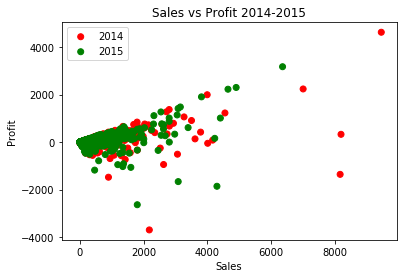

(None,
          order_id order_date customer_id   segment         category  \
 3  US-2015-108966 2015-10-11    SO-20335  Consumer        Furniture   
 4  US-2015-108966 2015-10-11    SO-20335  Consumer  Office Supplies   
 5  CA-2014-115812 2014-06-09    BH-11710  Consumer        Furniture   
 6  CA-2014-115812 2014-06-09    BH-11710  Consumer  Office Supplies   
 7  CA-2014-115812 2014-06-09    BH-11710  Consumer       Technology   
 
   sub_category     sales  quantity    profit  year  
 3       Tables  957.5775         5 -383.0310  2015  
 4      Storage   22.3680         2    2.5164  2015  
 5  Furnishings   48.8600         7   14.1694  2014  
 6          Art    7.2800         4    1.9656  2014  
 7       Phones  907.1520         6   90.7152  2014  )

In [176]:
import matplotlib.pyplot as plt

q6 = data.copy()
q6['year']=q6['order_date'].dt.year

plot_year = [2014,2015]
q6 = q6[q6['year'].isin(plot_year)]

colormap = {2014:'red',2015:'green'}

for item in plot_year:
    plt.scatter(q6['sales'][q6['year']==item],\
                q6['profit'][q6['year']==item],\
                c=q6['year'][q6['year']==item].map(colormap),
                label=item)
plt.title('Sales vs Profit 2014-2015')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.show(), q6.head(5)

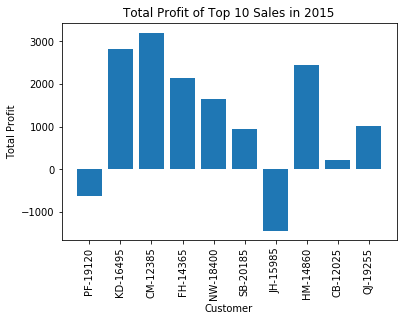

(None,
                 sales  quantity     profit   year
 customer_id                                      
 PF-19120     9022.324        68  -631.9789  32240
 KD-16495     7039.044        35  2810.0215  26195
 CM-12385     6682.260        15  3197.4580  10075
 FH-14365     6056.090        22  2139.7363   8060
 NW-18400     5511.316        36  1654.2153  20150
 SB-20185     5414.246        31   939.1590  14105
 JH-15985     5352.786        29 -1429.3776   8060
 HM-14860     5327.802        20  2450.9987  10075
 CB-12025     4662.553        55   223.4447  20150
 QJ-19255     4409.850         6  1014.4635   4030)

In [197]:
q7 = data.copy()
q7['year']=q7['order_date'].dt.year
q7 = q7[q7['year'].isin([2015])]
q7 = q7.groupby(['customer_id']).sum()
q7 = q7.sort_values(['sales'],ascending=False).head(10)

x = list(q7.index)
y = q7['profit']
y_pos = range(len(x))

plt.bar(y_pos,y,align='center')
plt.xticks(y_pos,x,rotation=90)
plt.xlabel('Customer')
plt.ylabel('Total Profit')
plt.title('Total Profit of Top 10 Sales in 2015')
plt.show(),q7